<a href="https://colab.research.google.com/github/mella30/Deep-Learning-with-Tensorflow-2/blob/main/Course2-Customising_your_models_with_Tensorflow_2/week1_multi_input_output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


# The Keras functional API

 ## Coding tutorials
 #### [1. Multiple inputs and outputs](#coding_tutorial_1)
 #### [2. Tensors and Variables](#coding_tutorial_2)
 #### [3. Accessing model layers](#coding_tutorial_3)
 #### [4. Freezing layers](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Multiple inputs and outputs

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the acute inflammations dataset

The `acute inflammations` was created by a medical expert as a data set to test the expert system, which will perform the presumptive diagnosis of two diseases of the urinary system. You can find out more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations).

Attribute information:

Inputs:
- Temperature of patient : 35C-42C
- Occurrence of nausea : yes/no
- Lumbar pain : yes/no
- Urine pushing (continuous need for urination) : yes/no
- Micturition pains : yes/no
- Burning of urethra, itch, swelling of urethra outlet : yes/no

Outputs:
- decision 1: Inflammation of urinary bladder : yes/no
- decision 2: Nephritis of renal pelvis origin : yes/no

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1CDPQSqpI7OjNIgOERWaI-BlQMI6vjzb9

You should store this file in Drive for use in this Colab notebook.

#### Load the data

In [4]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
# Load the dataset

from sklearn.model_selection import train_test_split

pd_dat = pd.read_csv('/content/gdrive/MyDrive/Colab_Notebooks/diagnosis.csv')
dataset = pd_dat.values

In [6]:
# Build train and test data splits

X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,:6], dataset[:,6:], test_size=0.33)

In [7]:
# Assign training and testing inputs/outputs

temp_train, nocc_train, lumbp_train, up_train, mict_train, bis_train = np.transpose(X_train)
temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test = np.transpose(X_test)

inflam_train, nephr_train = Y_train[:, 0], Y_train[:, 1]
inflam_test, nephr_test = Y_test[:, 0], Y_test[:, 1]

#### Build the model

In [12]:
# Build the input layers

from tensorflow.keras import Input, layers

inputs_shape = (1,)
temperature = Input(shape=inputs_shape, name='temp')
nausea_occurence = Input(shape=inputs_shape, name='nocc')
lumbar_pain = Input(shape=inputs_shape, name='lumbp')
urine_pushing = Input(shape=inputs_shape, name='up')
micturition_pains = Input(shape=inputs_shape, name='mict')
bis = Input(shape=inputs_shape, name='bis')



In [13]:
# Create a list of all the inputs

list_inputs = [temperature, nausea_occurence, lumbar_pain, urine_pushing, 
               micturition_pains, bis]

In [14]:
# Merge all input features into a single large vector

x = layers.concatenate(list_inputs)

In [17]:
# Use a logistic regression classifier for disease prediction

inflammation_pred = layers.Dense(1, activation='sigmoid', name='inflam')(x)
nephritis_pred = layers.Dense(1, activation='sigmoid', name='nephr')(x)

In [18]:
# Create a list of all the outputs

list_outputs = [inflammation_pred, nephritis_pred]

In [19]:
# Create the model object

model = tf.keras.Model(inputs=list_inputs, outputs=list_outputs)

#### Plot the model

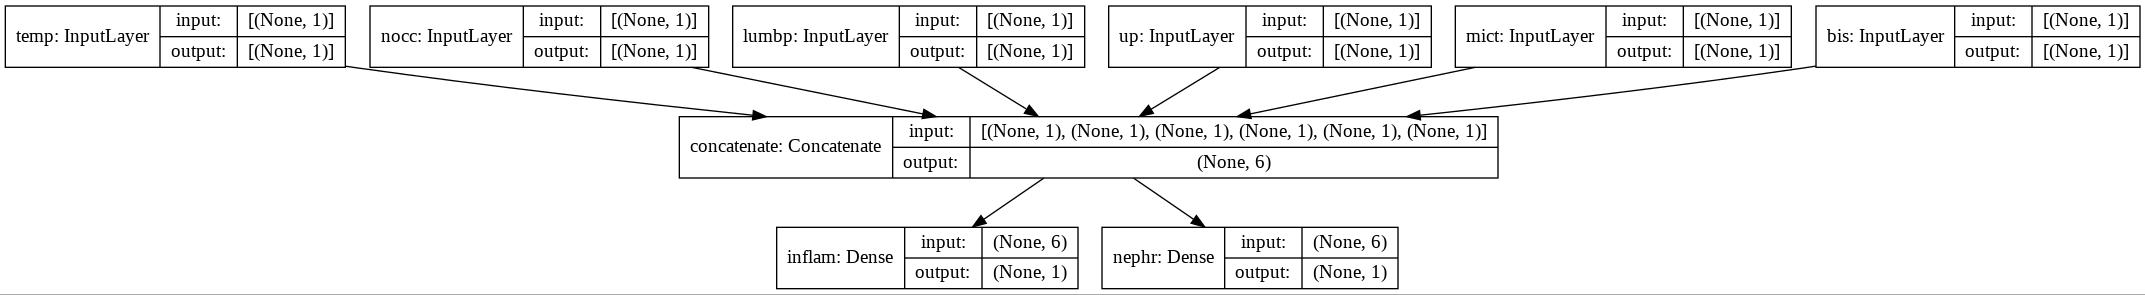

In [20]:
# Display the multiple input/output model

tf.keras.utils.plot_model(model, 'multi_input_output_model.jpg', show_shapes=True)

#### Compile the model

In [24]:
# Compile the model

model.compile(optimizer=tf.keras.optimizers.RMSprop(1e-3),
              loss=[{'inflam':'binary_crossentropy'}, {'nephr': 'binary_crossentropy'}],  # same loss function for both, could be just stated once
              loss_weights=[1., 0.2],
              metrics=['acc'],  # same metric for both tasks
              )

#### Fit the model 

In [26]:
# Define training inputs and outputs

inputs_train = {'temp': temp_train, 'nocc': nocc_train, 'lumbp': lumbp_train,
                'up': up_train, 'mict': mict_train, 'bis': bis_train}

outputs_train = {'inflam': inflam_train, 'nephr': nephr_train}

# alternative notation:
# inputs_train = [temp_train, nocc_train, lumbp_train, up_train, mict_train, bis_train]
# outputs_train = [inflam_train, nephr_train]

In [27]:
# Train the model

history = model.fit(inputs_train, outputs_train,
                    epochs=1000,
                    batch_size=128)

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 6.4261 - inflam_loss: 3.9915 - nephr_loss: 12.1731 - inflam_acc: 0.4750 - nephr_acc: 0.5500
Epoch 2/1000
1/1 [==============================] - 0s 5ms/step - loss: 6.3440 - inflam_loss: 3.9221 - nephr_loss: 12.1095 - inflam_acc: 0.4750 - nephr_acc: 0.5500
Epoch 3/1000
1/1 [==============================] - 0s 4ms/step - loss: 6.2845 - inflam_loss: 3.8718 - nephr_loss: 12.0634 - inflam_acc: 0.4750 - nephr_acc: 0.5500
Epoch 4/1000
1/1 [==============================] - 0s 14ms/step - loss: 6.2346 - inflam_loss: 3.8297 - nephr_loss: 12.0247 - inflam_acc: 0.4750 - nephr_acc: 0.5500
Epoch 5/1000
1/1 [==============================] - 0s 5ms/step - loss: 6.1904 - inflam_loss: 3.7923 - nephr_loss: 11.9904 - inflam_acc: 0.4750 - nephr_acc: 0.5500
Epoch 6/1000
1/1 [==============================] - 0s 3ms/step - loss: 6.1498 - inflam_loss: 3.7580 - nephr_loss: 11.9590 - inflam_acc: 0.4750 - nephr_acc: 0.5500
Epoch 7/1000
1/1

#### Plot the learning curves

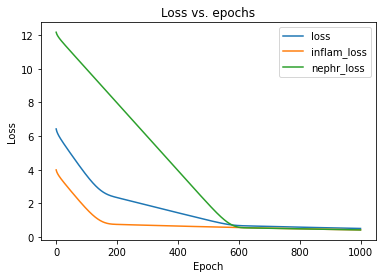

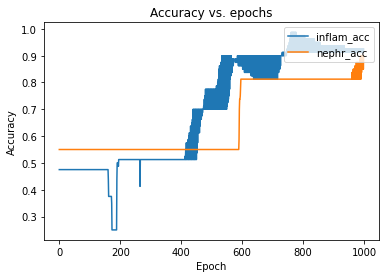

In [28]:
# Plot the training accuracy

acc_keys = [k for k in history.history.keys() if k in ('inflam_acc', 'nephr_acc')] 
loss_keys = [k for k in history.history.keys() if not k in acc_keys]

for k, v in history.history.items():
    if k in acc_keys:
        plt.figure(1)
        plt.plot(v)
    else:
        plt.figure(2)
        plt.plot(v)

plt.figure(1)
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(acc_keys, loc='upper right')

plt.figure(2)
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loss_keys, loc='upper right')

plt.show()

In [31]:
# Evaluate the model

model.evaluate([temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test], 
               [inflam_test, nephr_test])

2/2 [==============================] - 0s 7ms/step - loss: 0.5167 - inflam_loss: 0.4323 - nephr_loss: 0.4221 - inflam_acc: 0.9250 - nephr_acc: 0.8500


[0.5166634321212769,
 0.4322507381439209,
 0.42206376791000366,
 0.925000011920929,
 0.8500000238418579]

***
<a id="coding_tutorial_2"></a>
## Tensors and Variables

In [ ]:
import numpy as np

#### Create Variable objects

In [ ]:
# Create Variable objects of different type with tf.Variable

strings = tf.Variable(["Hello world!"], tf.string)
floats  = tf.Variable([3.14159, 2.71828], tf.float64)
ints = tf.Variable([1, 2, 3], tf.int32)
complexs = tf.Variable([25.9 - 7.39j, 1.23 - 4.91j], tf.complex128)

In [ ]:
# Initialise a Variable value



#### Use and modify Variable values

In [ ]:
# Use the value of a Variable

v = tf.Variable(0.0)
w = v + 1  # w is a tf.Tensor which is computed based on the value of v.

print(type(w))

In [ ]:
# Increment the value of a Variable



In [ ]:
# Decrement the value of a Variable



#### Create Tensor objects

Create a constant tensor and print its type as well as its shape:

In [ ]:
# Create a constant Tensor

x = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x)
print("dtype:", x.dtype)
print("shape:", x.shape)

In [ ]:
# Obtain the value as a numpy array



In [ ]:
# Create a Tensor of type float32



In [ ]:
# Create coefficients

coeffs = np.arange(16)

In [ ]:
# Initialise shapes



In [ ]:
# Create Tensors of different shape

a = tf.constant(coeffs, shape=shape1)
print("\n a:\n ", a)

b = tf.constant(coeffs, shape=shape2)
print("\n b:\n ", b)

c = tf.constant(coeffs, shape=shape3)
print("\n c:\n ", c)

#### Useful Tensor operations

In [ ]:
# Create a constant Tensor

t = tf.constant(np.arange(80), shape=[5,2,8])

In [ ]:
# Get the rank of a Tensor



In [ ]:
# Display the rank

print("rank: ", rank)

In [ ]:
# Reshape a Tensor



In [ ]:
# Display the new shape

print("t2.shape: ", t2.shape)

In [ ]:
# Create ones, zeros, identity and constant Tensors



In [ ]:
# Display the created tensors

print("\n Ones:\n ", ones)
print("\n Zeros:\n ", zeros)
print("\n Identity:\n ", eye)
print("\n Tensor filled with 7: ", tensor7)

In [ ]:
# Create a ones Tensor and a zeros Tensor

t1 = tf.ones(shape=(2, 2))
t2 = tf.zeros(shape=(2, 2))

In [ ]:
# Concatentate two Tensors



In [ ]:
# Display the concatenated tensors

print(concat0)
print(concat1)

In [ ]:
# Create a constant Tensor

t = tf.constant(np.arange(24), shape=(3, 2, 4))
print("\n t shape: ", t.shape)

In [ ]:
# Expanding the rank of Tensors



In [ ]:
# Display the shapes after tf.expand_dims

print("\n After expanding dims:\n t1 shape: ", t1.shape, "\n t2 shape: ", t2.shape, "\n t3 shape: ", t3.shape)

In [ ]:
# Squeezing redundant dimensions



In [ ]:
# Display the shapes after tf.squeeze

print("\n After squeezing:\n t1 shape: ", t1.shape, "\n t2 shape: ", t2.shape, "\n t3 shape: ", t3.shape)

In [ ]:
# Slicing a Tensor



#### Doing maths with Tensors

In [ ]:
# Create two constant Tensors

c = tf.constant([[1.0, 2.0], [3.0, 4.0]])
d = tf.constant([[1.0, 1.0], [0.0, 1.0]])

In [ ]:
# Matrix multiplication



In [ ]:
# Display the result

print("\n tf.matmul(c,d):\n", matmul_cd)

In [ ]:
# Elementwise operations



In [ ]:
# Display the results

print("\n c*d:\n", c_times_d)
print("\n c+d:\n", c_plus_d)
print("\n c-d:\n", c_minus_d)
print("\n c/c:\n", c_div_c)

In [ ]:
# Create Tensors

a = tf.constant([[2, 3], [3, 3]])
b = tf.constant([[8, 7], [2, 3]])
x = tf.constant([[-6.89 + 1.78j], [-2.54 + 2.15j]])

In [ ]:
# Absolute value of a Tensor



In [ ]:
# Power of a Tensor



In [ ]:
# Display the results

print("\n ", absx)
print("\n ", powab)

#### Randomly sampled constant tensors

In [ ]:
# Create a Tensor with samples from a Normal distribution



In [ ]:
# Create a Tensor with samples from a Uniform distribution



In [ ]:
# Create a Tensor with samples from a Poisson distribution



In [ ]:
# More maths operations

d = tf.square(tn)
e = tf.exp(d)
f = tf.cos(c)

***
<a id="coding_tutorial_3"></a>
## Accessing model layers

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the pre-trained model

In this section, we aim to demonstrate accessing layer attributes within a model.

Let's get started by loading the `VGG19` pre-trained model from the `keras.applications` library, which is a very deep network trained on more than a million images from the ImageNet database. The network is trained to classify images into 1000 object categories.

In [ ]:
# Load the VGG19 model



In [ ]:
# Get the inputs, layers and display the summary

vgg_input = vgg_model.input
vgg_layers = vgg_model.layers
vgg_model.summary()

#### Build a model to access the layer outputs

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
# Build a model that returns the layer outputs



In [ ]:
# Plot the model



In [ ]:
# Test the model on a random input



#### Load the 'cool cat' picture

In Zambia’s South Luangwa National Park, a photographer had been watching a pride of lions while they slept off a feast from a buffalo kill. When this female walked away, he anticipated that she might be going for a drink and so he positioned his vehicle on the opposite side of the waterhole. The `cool cat` picture is one of the highly commended 2018 Image from Wildlife Photographer of the Year.

#### Import the picture

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1myXpP8QFvhATqg0bPYhCpVS48_OgAC0L

You should store this file in Drive for use in this Colab notebook.

In [ ]:
# Display the original image

import IPython.display as display
from PIL import Image

display.display(Image.open('path/to/cool_cat.jpg'))

#### Visualise network features from the input image

In [ ]:
# Preprocess the image

from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image

img_path = 'path/to/cool_cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [ ]:
# Extract the features



In [ ]:
# Visualise the input channels



In [ ]:
# Visualise some features in the first hidden layer



In [ ]:
# Build a model to extract features by layer name



In [ ]:
# Visualise some features from the extracted layer output



In [ ]:
# Extract features from a layer deeper in the network



In [ ]:
# Visualise some features from the extracted layer output



***
<a id="coding_tutorial_4"></a>
## Freezing layers

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Build the model

In [ ]:
# Build a small Sequential model

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                 bias_initializer='ones'),
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax'),
])

In [ ]:
# Display the model summary

model.summary()

#### Examine the weight matrix variation over training

In [ ]:
# Retrieve the weights and biases



In [ ]:
# Construct a synthetic dataset

x_train = np.random.random((100, 4))
y_train = x_train

x_test = np.random.random((20, 4))
y_test = x_test

In [ ]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [ ]:
# Retrieve weights and biases



In [ ]:
# Plot the variation

plt.figure(figsize=(8,8))
for n in range(3):
    delta_l = W1_layers[n] - W0_layers[n]
    print('Layer '+str(n)+': bias variation: ', np.linalg.norm(b1_layers[n] - b0_layers[n]))
    ax = plt.subplot(1,3,n+1)
    plt.imshow(delta_l)
    plt.title('Layer '+str(n))
    plt.axis('off')
plt.colorbar()
plt.suptitle('Weight matrices variation');

#### Freeze layers at build time

In [ ]:
# Count the trainable and non trainable variables before the freezing



In [ ]:
# Display the number of trainable and non trainable variables before the freezing

print("\n Before freezing:\n\t Number of trainable variables: ", n_trainable_variables,
                         "\n\t Number of non trainable variables: ", n_non_trainable_variables)

In [ ]:
# Build the model



In [ ]:
# Count the trainable and non trainable variables after the freezing



In [ ]:
# Display the number of trainable and non trainable variables after the freezing

print("\n After freezing:\n\t Number of trainable variables: ", n_trainable_variables,
                         "\n\t Number of non trainable variables: ", n_non_trainable_variables)

In [ ]:
# Retrieve weights and biases



In [ ]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [ ]:
# Retrieve weights and biases



In [ ]:
# Plot the variation



#### Freeze layers of a pre-built model

In [ ]:
# Count the trainable and non trainable variables before the freezing

print("\n Before freezing:\n\t Number of trainable variables: ", len(model.trainable_variables),
                         "\n\t Number of non trainable variables: ", len(model.non_trainable_variables))

In [ ]:
# Freeze the second layer



In [ ]:
# Count the trainable and non trainable variables after the freezing

print("\n After freezing:\n\t Number of trainable variables: ", len(model.trainable_variables),
                        "\n\t Number of non trainable variables: ", len(model.non_trainable_variables))

In [ ]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [ ]:
# Retrieve weights and biases



In [ ]:
# Plot the variation

